## SMC

Stochastic volatility model

\begin{eqnarray}
l_t & \sim & {\mathcal N}(l_{t-1}, v) \\ 
y_t & \sim & {\mathcal N}(0, \exp(l_t))  
\end{eqnarray}

In [112]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd

T = 50

l = np.zeros(T)
y = np.zeros(T)
l0 = -3
v = 0.05

for i in range(T):
    if i==0:
        l[i] = l0 + np.sqrt(v)*np.random.randn()
    else:
        l[i] = l[i-1] + np.sqrt(v)*np.random.randn()

    y[i] = np.exp(l[i]/2)*np.random.randn()
    

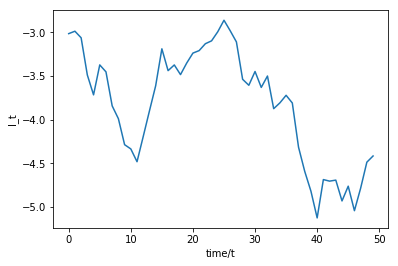

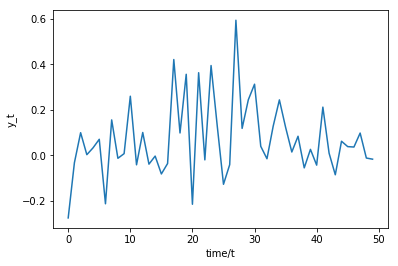

In [113]:
plt.plot(l)
plt.xlabel('time/t')
plt.ylabel('l_t')
plt.show()
plt.plot(y)
plt.xlabel('time/t')
plt.ylabel('y_t')
plt.show()


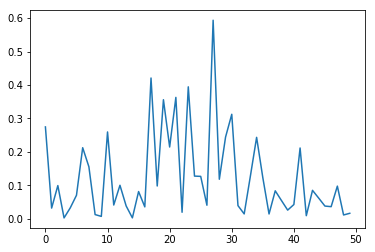

In [114]:
plt.plot(np.abs(y))
plt.show()

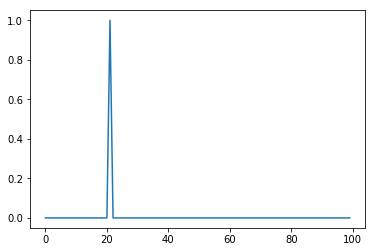

In [23]:
plt.plot(np.exp(loglik-np.max(loglik)))

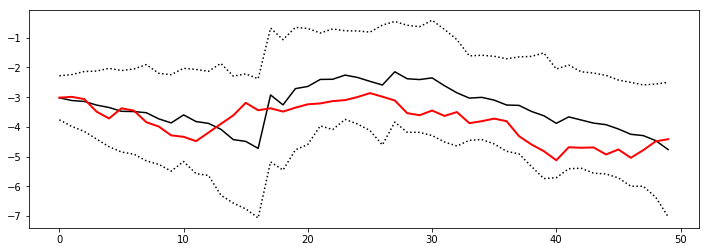

In [119]:

# Number of particles
N = 50

S = np.zeros((N,T))
l_est = np.zeros(T)
var_est = np.zeros(T)
ess = np.zeros(T)

loglik = np.zeros(N)

for t in range(T):
    for n in range(N):
        if t==0:
            S[n,t] = l0 + np.sqrt(v)*np.random.randn()
        else:
            S[n,t] = S[n,t-1] + np.sqrt(v)*np.random.randn()

        loglik[n] = loglik[n] + -0.5*np.log(np.pi*2) - 0.5*S[n,t] - 0.5*(y[t]**2)*np.exp(-S[n,t])

    norm_weight = np.exp(loglik-np.max(loglik))
    norm_weight = norm_weight/np.sum(norm_weight)
    l_est[t] = np.sum(S[:,t]*norm_weight)
    var_est[t] = np.sum(S[:,t]**2*norm_weight) - l_est[t]**2

    ess[t] = 1/(N*np.sum(norm_weight**2))
    
    if ess[t]<0.9:  # Resampling step      
        

        idx = np.random.choice(range(N), p=norm_weight, size=N)

        S[:,t] = S[idx, t]
        loglik = np.zeros_like(loglik)
        
    
plt.figure(figsize=(12,4))

#for n in range(N):
#    plt.plot(S[n,:], 'k.')

plt.plot(l_est, 'k')
plt.plot(3*np.sqrt(var_est)+l_est, ':k')
plt.plot(-3*np.sqrt(var_est)+l_est, ':k')
#plt.plot(l_est, 'k')

plt.plot(l, color='r', linewidth=2)

plt.show()

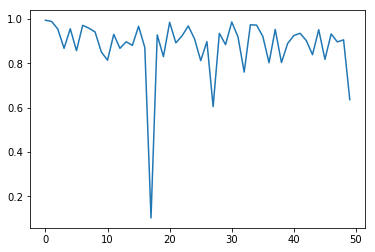

In [120]:
plt.plot(ess)

In [ ]:

# Number of particles
N = 10

# Particles and their histories
S = np.zeros((N,T))

l_est = np.zeros(T)
var_est = np.zeros(T)

loglik = np.zeros(N)

for t in range(T):
    for n in range(N):
        if t==0:
            S[n,t] = l0 + np.sqrt(v)*np.random.randn()
        else:
            S[n,t] = S[n,t-1] + np.sqrt(v)*np.random.randn()

        loglik[n] = loglik[n] + -0.5*np.sqrt(np.pi*2) - 0.5*S[n,t] - 0.5*(y[t]**2)*np.exp(-S[n,t])
        norm_weight = np.exp(loglik-np.max(loglik))
        norm_weight = norm_weight/np.sum(norm_weight)
        l_est[t] = np.sum(S[:,t]*norm_weight)
        var_est[t] = np.sum(S[:,t]**2*norm_weight) - l_est[t]**2
    if t%5==0:       


        idx = np.random.choice(range(N), p=norm_weight, size=N)

        S[:,t] = S[idx, t]
        loglik = np.zeros_like(loglik)
        
    

#for n in range(N):
#    plt.plot(S[n,:], 'k')
plt.figure(figsize=(12,4))
plt.plot(l_est, 'k')
plt.plot(3*np.sqrt(var_est)+l_est, ':k')
plt.plot(-3*np.sqrt(var_est)+l_est, ':k')
plt.plot(l_est, 'k')

plt.plot(l, color='r', linewidth=2)

plt.show()